# Estimating the Number of Reviews in the Google Play Store Dataset using Scikit-learn

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5] 

In [2]:
from sklearn import set_config
set_config(display='diagram')

# Exploratory Data Analysis

In [3]:
playstore_data = pd.read_csv('Google Play Store.csv')
playstore_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


The Google Play Store dataset contains information about every app's rating, number of reviews, size, installs, price and so on. `Last Updated`, `Current Ver` and `Android Ver` columns don't contain useful information to improve the predictive performance, so they can be safely removed.

In [4]:
playstore_data.drop(columns=['Last Updated', 'Current Ver', 'Android Ver'], inplace=True)
playstore_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres'],
      dtype='object')

Let's get some basic statistics of the numeric columns in the dataset.

In [5]:
playstore_data.describe(include=np.number)

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


This tells us that there is only one numeric column in the dataset. However, it's possible that other numeric columns (such as `Price`, `Rating` and `Size`) may be incorrectly encoded.

In [6]:
playstore_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
dtype: object

Let's check the columns one at a time and remove null values if any and choose the appropriate data type. Starting with `Content Rating` column.

In [7]:
playstore_data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

We can see that the data type for `Content Rating` column is correctly chosen as categorical ('object' in pandas) type. However, from the unique() method of the series object, we could see that the last value is 'nan' — meaning it has null values. Let's fix that.

In [8]:
playstore_data['Content Rating'].isna().any()

True

In [9]:
playstore_data[playstore_data['Content Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018"


In [10]:
playstore_data.drop(index=10472, inplace=True)

In [11]:
playstore_data['Content Rating'].isna().any()

False

In [12]:
playstore_data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [13]:
playstore_data['Rating'].dtype

dtype('float64')

We could see that data type for the `Rating` column is numeric. But we observe that this column has null values. Let's examine this.

In [14]:
playstore_data[playstore_data['Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty
...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business


There are 1474 rows with no ratings. Let's remove these records from the dataset.

In [15]:
nan_indices = list(playstore_data[playstore_data['Rating'].isna()].index)

In [16]:
len(nan_indices)

1474

In [17]:
playstore_data.drop(index=nan_indices, inplace=True)

In [18]:
playstore_data['Rating'].isna().any()

False

In [19]:
playstore_data['Reviews'].isna().any()

False

In [20]:
playstore_data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

While the `Reviews` column doesn't have any null values, it's been incorrectly chosen as categorical variable. Let's fix that.

In [21]:
playstore_data['Reviews'] = playstore_data['Reviews'].astype(int)

In [22]:
playstore_data['Reviews'].dtype

dtype('int32')

In [23]:
playstore_data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

The `Price` column is incorrectly identified as object — possibly due to the '\\$' sign in the values. One possible solution could be to remove the '\\$' sign and convert the data type to float.

In [24]:
playstore_data['Price'] = playstore_data['Price'].str.lstrip('$').astype(float)

In [25]:
playstore_data['Price'].isna().any()

False

In [26]:
playstore_data['Price'].dtype

dtype('float64')

In [27]:
playstore_data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

The `Installs` column data type is correctly identified as object and doesn't have any null values.

In [28]:
playstore_data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

The `Type` column is good and doesn't have any issues.

In [29]:
playstore_data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

The issue in the `Size` column is similar to that of the `Price` column. Here we have to convert the data type and convert k and M values by their respective values.

In [30]:
def size_converter(string_num):
    if 'k' in string_num:
        return float(string_num.rstrip('k')) * 1000
    elif 'M' in string_num:
        return float(string_num.rstrip('M')) * 1000000
    else:
        return 0

In [31]:
playstore_data['Size'] = playstore_data['Size'].apply(size_converter).astype('float')

In [32]:
playstore_data['Size'].dtype

dtype('float64')

Here's a small catch. There's a value in size — 'Varies with device' which can't be converted directly into a values. One possible thing we could do is, without removing these records, we can try to replace it with the mean size value. We first encode it as zero, find the mean size and replace all zero-values with the mean size.

In [33]:
mean_size = playstore_data['Size'].mean()

In [34]:
playstore_data['Size'][playstore_data['Size'] == 0] = mean_size

C:\WINDOWS\TEMP/ipykernel_12800/1615742949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore_data['Size'][playstore_data['Size'] == 0] = mean_size


In [35]:
playstore_data['Size'].min()

8500.0

In [36]:
playstore_data['Size'].max()

100000000.0

In [37]:
playstore_data.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object

We've done the data cleaning part. Let's explore further to find any anomalies.

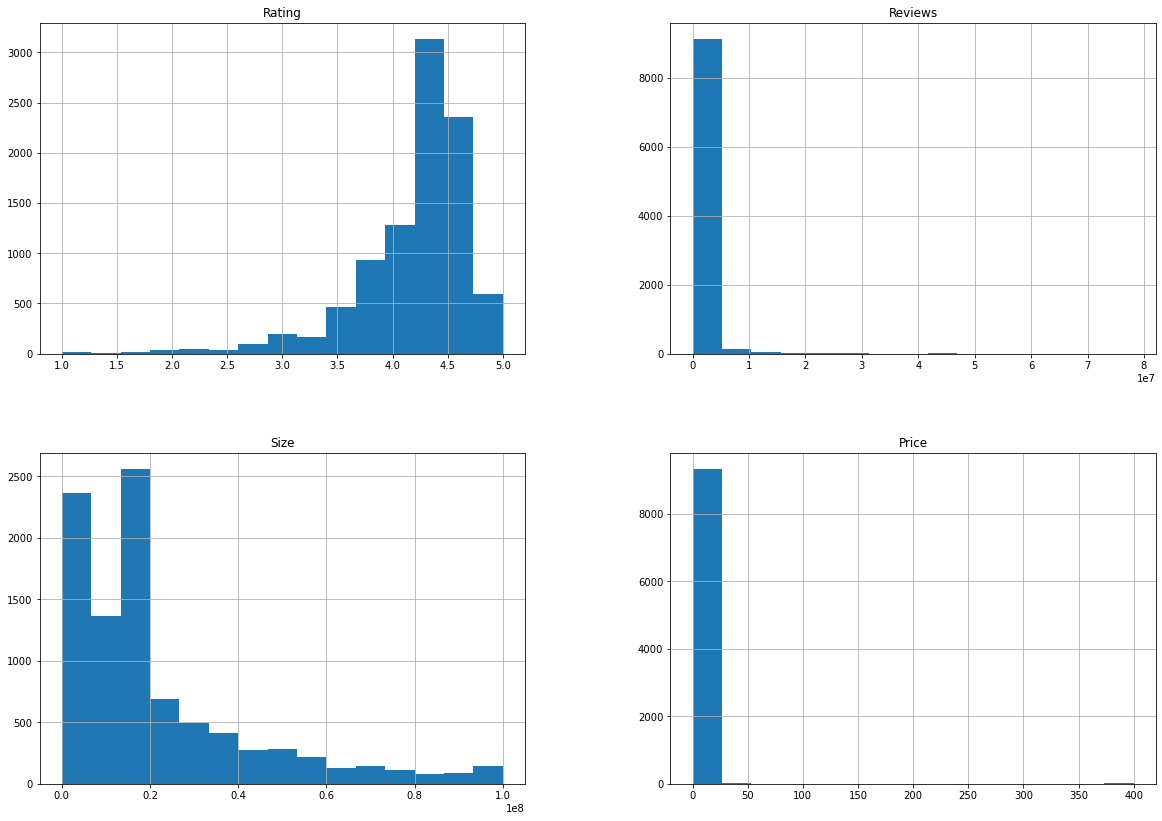

In [38]:
playstore_data.hist(figsize=(20, 14), bins=15);

The histogram of the `Price` column appears to have an outlier. Let's explore.

In [39]:
playstore_data['Price'].describe()

count    9366.000000
mean        0.960928
std        15.816585
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

The distribution shows that values are skewed. But doesn't appear to have very high value outliers. The maximum value is \\$400.

In [40]:
playstore_data[playstore_data['Price'] == 400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,"10,000+",Paid,400.0,Everyone,Lifestyle


Here, there's a record where the price is \\$400 which isn't too high. The influence of removing or keeping shouldn't impact the performance of the estimator. But other thing to observe is that `Category` and `Genres` column more or less tell us essentially the same information. And one could be removed safely.

In [41]:
playstore_data.drop(columns=['Genres'], inplace=True)

In [42]:
playstore_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating'],
      dtype='object')

In [43]:
playstore_data.isna().any()

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
dtype: bool

Now we're all set to do preprocessing before building the machine learning model.

# Preprocessing

Here, we try to estimate the number of reviews based on other parameters like `App`, `Rating`, `Reviews` and so on. Usually people tend to buy an app for it's rating and the number of reviews. More number of reviews at least say that more people has downloaded it. So, we're estimating the number of reviews.

In [44]:
target_name = 'Reviews'
data = playstore_data.drop(columns=['Reviews'])
target = playstore_data[target_name]

Let's first separate numerical and categorical columns so that we can encode them accordingly.

In [45]:
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
numerical_columns_selector = selector(dtype_exclude=object)

In [46]:
categorical_columns = categorical_columns_selector(data)
numerical_columns = numerical_columns_selector(data)

In [47]:
categorical_columns

['App', 'Category', 'Installs', 'Type', 'Content Rating']

In [48]:
numerical_columns

['Rating', 'Size', 'Price']

Now, let's encode the categorical columns using `OrdinalEncoder` class and numerical columns using `StandardScaler` class. And we're using `ColumnTransformer` class to transform the data based on the encoding as specified.

In [49]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

categorical_preprocessor = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
numerical_preprocessor = StandardScaler()

In [50]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([('cat_preprocessor', categorical_preprocessor, categorical_columns),
                                  ('num_preprocessor', numerical_preprocessor, numerical_columns)],
                                 remainder='passthrough', sparse_threshold=0)

In [51]:
preprocessor

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('cat_preprocessor',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['App', 'Category', 'Installs', 'Type',
                                  'Content Rating']),
                                ('num_preprocessor', StandardScaler(),
                                 ['Rating', 'Size', 'Price'])])

# Machine Learning Pipeline

Now, let's start building machine learning pipelines. Initially, we're building a baseline regressor, called dummy regressor that will always predict the median number of reviews. This model doesn't use any information from features like `App`, `Category`, `Rating` and so on.

Then we'll use a single decision tree that uses the features mentioned above to estimate the number of reviews and we're going to compare the models. Ideally, we'd expect the performance of the single decision tree model to be better (as they made use of features) instead of the dummy regressor that always predicts the median number of reviews without using any feature information.

Here we're using 'median' value for the dummy regressor as the histogram of the `Reviews` column suggests that it's right-skewed. So, median will be a better estimate than the mean.

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor

dummy_model = Pipeline([('preprocessor', preprocessor), ('dummy_regressor', DummyRegressor(strategy='median'))])
dummy_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('cat_preprocessor',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['App', 'Category',
                                                   'Installs', 'Type',
                                                   'Content Rating']),
                                                 ('num_preprocessor',
                                                  StandardScaler(),
                                                  ['Rating', 'Size',
                                                   'Price'])])),
                ('dummy_regressor', DummyRegressor(strategy='median'))])

In [53]:
%%time
from sklearn.model_selection import cross_validate, ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=5)
cv_dummy = cross_validate(dummy_model, data, target, cv=cv, scoring='neg_median_absolute_error', n_jobs=-1)

Wall time: 4.34 s


In [54]:
error_dummy = pd.Series(-cv_dummy['test_score'], name='Dummy Regressor')
error_dummy

0    6206.0
1    5749.5
2    6010.0
3    5559.5
4    5505.5
5    5662.0
6    5882.0
7    5794.0
8    6010.0
9    5661.0
Name: Dummy Regressor, dtype: float64

In [55]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = Pipeline([('preprocessor', preprocessor), \
                                ('decision_tree_regressor', DecisionTreeRegressor())])
decision_tree_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                                   transformers=[('cat_preprocessor',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['App', 'Category',
                                                   'Installs', 'Type',
                                                   'Content Rating']),
                                                 ('num_preprocessor',
                                                  StandardScaler(),
                                                  ['Rating', 'Size',
                                                   'Price'])])),
                ('decision_tree_regressor', DecisionTreeRegressor())])

In [56]:
%%time

cv_decision_tree = cross_validate(decision_tree_model, data, target, cv=cv, scoring='neg_median_absolute_error',\
                                  n_jobs=-1)

Wall time: 788 ms


In [57]:
error_decision_tree = pd.Series(-cv_decision_tree['test_score'], name='Decision Tree Regressor')
error_decision_tree

0    1236.500000
1    1608.500000
2    1346.000000
3    1445.500000
4    1588.000000
5    1049.500000
6    1175.000000
7    1036.000000
8     900.500000
9    1561.333333
Name: Decision Tree Regressor, dtype: float64

In [58]:
errors = pd.concat([error_dummy, error_decision_tree], axis=1)
errors

,Dummy Regressor,Decision Tree Regressor
0,6206.0,1236.500000
1,5749.5,1608.500000
2,6010.0,1346.000000
3,5559.5,1445.500000
4,5505.5,1588.000000
5,5662.0,1049.500000
6,5882.0,1175.000000
7,5794.0,1036.000000
8,6010.0,900.500000
9,5661.0,1561.333333


Text(0.5, 1.0, 'Cross-validation Test Errors')

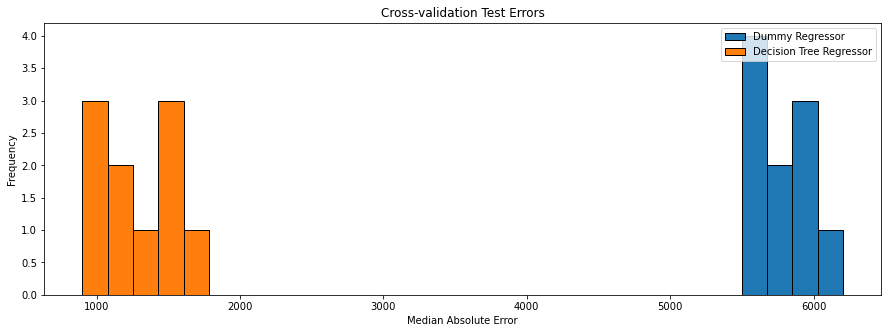

In [59]:
errors.plot.hist(bins=30, edgecolor='black')
plt.legend(loc='upper right')
plt.xlabel('Median Absolute Error')
plt.title('Cross-validation Test Errors')

In [60]:
np.round(errors.mean(axis=0), 2)

Dummy Regressor            5803.95
Decision Tree Regressor    1294.68
dtype: float64

The mean value of the decision tree regressor is better than that of the dummy regressor. The decision tree model makes lesser error than that of the dummy regressor. We can infer that the features prove to be useful in estimating the number of reviews. 

## Validation Curve

In [61]:
transformed_data = preprocessor.fit_transform(data)

In [62]:
from sklearn.model_selection import validation_curve

max_depth = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
train_scores, test_scores = validation_curve(DecisionTreeRegressor(), transformed_data, target, cv=cv, param_name='max_depth',\
                                            param_range=max_depth, scoring='neg_median_absolute_error', n_jobs=-1)
train_errors, test_errors = -train_scores, -test_scores

Text(0.5, 1.0, 'Validation Curve of the Decision Tree Regressor')

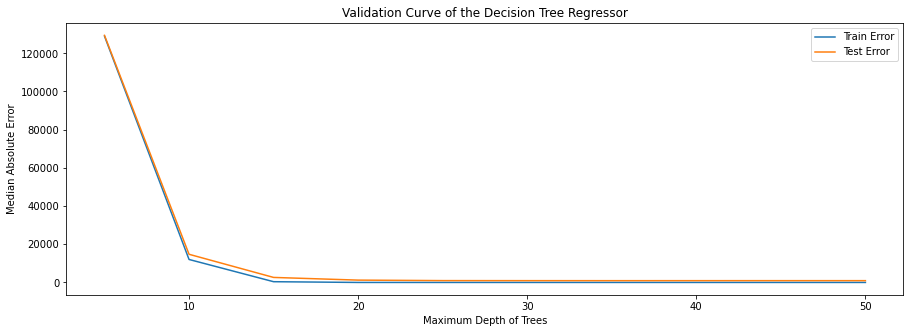

In [63]:
plt.plot(max_depth, train_errors.mean(axis=1), label='Train Error')
plt.plot(max_depth, test_errors.mean(axis=1), label='Test Error')
plt.legend()

plt.xlabel('Maximum Depth of Trees')
plt.ylabel('Median Absolute Error')
plt.title('Validation Curve of the Decision Tree Regressor')

The Validation Curve suggests that the optimal value for the 'Maximum Depth of Trees' parameter lies very close to 10. This curve simplifies the search space for the optimal parameters that will effectivey minimize the error when estimating the number of reviews.

## Hyperparameter Tuning

When considering the parameters to tune for the decision tree regresssor, most often, it's the `max_depth` parameter that decides if a model will overfit or underfit. So, we choose the `max_depth` parameter to tune the model that optimally fits the data.

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [8, 9, 10]}
inner_cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=5)
outer_cv = ShuffleSplit(n_splits=20, test_size=0.25, random_state=5)

hyperparam_search = GridSearchCV(DecisionTreeRegressor(criterion='absolute_error'), param_grid=param_grid,\
                                 cv=inner_cv, n_jobs=-1)
cv_res = cross_validate(hyperparam_search, transformed_data, target, cv=outer_cv, \
                        scoring='neg_median_absolute_error', return_estimator=True, return_train_score=True)

In [65]:
cv_res

{'fit_time': array([16.31494451, 16.21519876, 13.55489016, 13.03300333, 14.55348611,
        16.48319674, 17.3795259 , 16.14406061, 15.92760968, 19.08343911,
        17.91536355, 15.33890867, 13.31965208, 11.33652782, 11.90519714,
        10.59944558, 11.05991316, 13.36505651, 11.75073218, 11.12381506]),
 'score_time': array([0.0054512 , 0.00061321, 0.        , 0.        , 0.        ,
        0.        , 0.0019834 , 0.        , 0.        , 0.00202489,
        0.        , 0.        , 0.0009973 , 0.00099874, 0.        ,
        0.00099969, 0.        , 0.0009985 , 0.00103354, 0.        ]),
 'estimator': [GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=5, test_size=0.25, train_size=None),
               estimator=DecisionTreeRegressor(criterion='absolute_error'),
               n_jobs=-1, param_grid={'max_depth': [8, 9, 10]}),
  GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=5, test_size=0.25, train_size=None),
               estimator=DecisionTreeRegressor(criterion='absolu

In [66]:
for est in cv_res['estimator']:
    print(est.best_params_)

{'max_depth': 10}
{'max_depth': 10}
{'max_depth': 10}
{'max_depth': 10}
{'max_depth': 10}
{'max_depth': 10}
{'max_depth': 10}
{'max_depth': 10}
{'max_depth': 10}
{'max_depth': 10}
{'max_depth': 10}
{'max_depth': 10}
{'max_depth': 10}
{'max_depth': 10}
{'max_depth': 10}
{'max_depth': 9}
{'max_depth': 10}
{'max_depth': 10}
{'max_depth': 10}
{'max_depth': 10}


In [67]:
train_error = pd.Series(-cv_res['train_score'], name='Train Errors')
test_error = pd.Series(-cv_res['test_score'], name='Test Errors')
errors = pd.concat([train_error, test_error], axis=1)
errors

,Train Errors,Test Errors
0,1559.25,2207.50
1,1659.25,2999.00
2,1602.50,2500.00
3,1492.50,2623.50
4,1880.75,3655.75
5,1874.00,3204.00
6,2038.50,2845.25
7,2111.50,3553.50
8,1772.50,2960.25
9,2090.00,3643.00


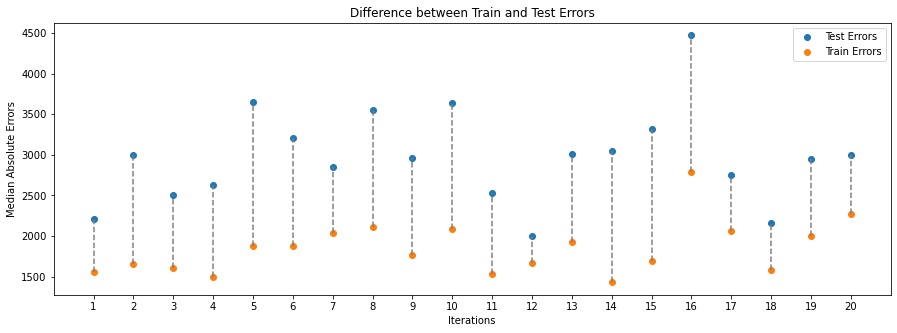

In [68]:
plt.scatter(np.arange(1, 21), -cv_res['test_score'], label='Test Errors')
plt.scatter(np.arange(1, 21), -cv_res['train_score'], label='Train Errors')
plt.legend()
for idx, (train_error, test_error) in enumerate(zip(errors['Train Errors'], errors['Test Errors'])):
    plt.plot([idx + 1, idx + 1], [train_error, test_error], linestyle='--', color='gray')
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
plt.xticks(x)
plt.xlabel('Iterations')
plt.ylabel('Median Absolute Errors')
plt.title('Difference between Train and Test Errors')
plt.xlim(0, 21);

In [69]:
train_errors, test_errors = -cv_res['train_score'], -cv_res['test_score']
print('Mean Training Error: ', np.round(train_errors.mean(), 2))
print('Mean Testing Error : ', np.round(test_errors.mean(), 2))

Mean Training Error:  1851.78
Mean Testing Error :  2971.84


The hyperparameter tuning returns optimal value for `max_depth` to be 10 — which when trained and tested in production environment will lead to lowest training error.  

In [70]:
print('Minimum number of reviews:', playstore_data['Reviews'].min())
print('Maximum number of reviews:', playstore_data['Reviews'].max())
print('Range                    :', playstore_data['Reviews'].max() - playstore_data['Reviews'].min())

Minimum number of reviews: 1
Maximum number of reviews: 78158306
Range                    : 78158305


On average, this model makes an error of about 2950 when estimating the number of reviews. When compared to the range of values for the `Reviews` column, our model is quite good at estimating the numbers with comparatively lower error.